In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

¿Cómo ha evolucionado la cantidad e índice de homicidios a nivel global?

¿Cómo ha evolucionado la cantidad e índice de homicidios en cada uno de los continentes?

¿Cuál es la tendencia de la cantidad e indice de homcidios en los paises con estas cantidades más altas?

¿Cuál es la proporción de los homicidios registrados en diversos países de América?

¿Como han evolucionado las cantidades de homicidios en las zonas de América?


In [3]:
homicide=pd.read_csv("homicide_country_data.csv")

Separo la base de datos en dos, una para la cantidad de homicidios y otra para índice de homicidios.

In [12]:
homicide['Indicator']=='Homicide Total Count'
count= homicide[homicide['Indicator']=='Homicide Total Count']
rate= homicide[homicide['Indicator']=='Homicide Rate']

Hago un arreglo con los años que maneja la base de datos, esto servirá al momento de graficar.

In [14]:
años=rate[rate['Region']=='Asia'].describe().iloc[1:2].T.index

Para el primer gráfico tomo el renglón de media de la tabla que se obtiene al usar rate.describe() o count.describe() y grafico los promedios de cada año a nivel global.

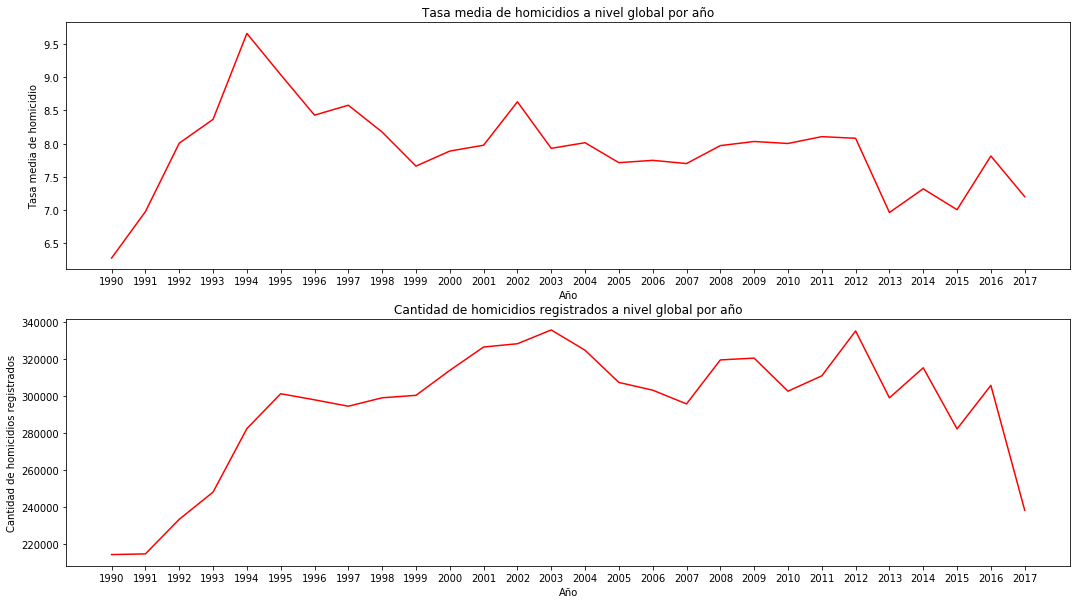

In [15]:
plt.figure(1,figsize=[18,10])

ax=plt.subplot(2, 1, 1)

ax.set_ylabel('Tasa media de homicidio');
ax.set_xlabel('Año');
ax.set_title('Tasa media de homicidios a nivel global por año')


plt.plot(años,rate.describe().iloc[1:2].T,'r')


ax=plt.subplot(2, 1, 2)

ax.set_ylabel('Cantidad de homicidios registrados');
ax.set_xlabel('Año');
ax.set_title('Cantidad de homicidios registrados a nivel global por año')

plt.plot(años,count.loc[:,'1990':'2017'].sum(),'r')

Para el segundo gráfico filtro los datos de cada continente que en la base de datos viene etiquetado como 'Region', esto se logra usando "rate[rate['Region']=='Oceania']" por ejemplo para una tabla solo con los datos de Oceanía. Después obtengo el promedio del índice de homicidios mediante el comando .describe() y la suma de homicidios usando el comando .sum() para cada continente. 

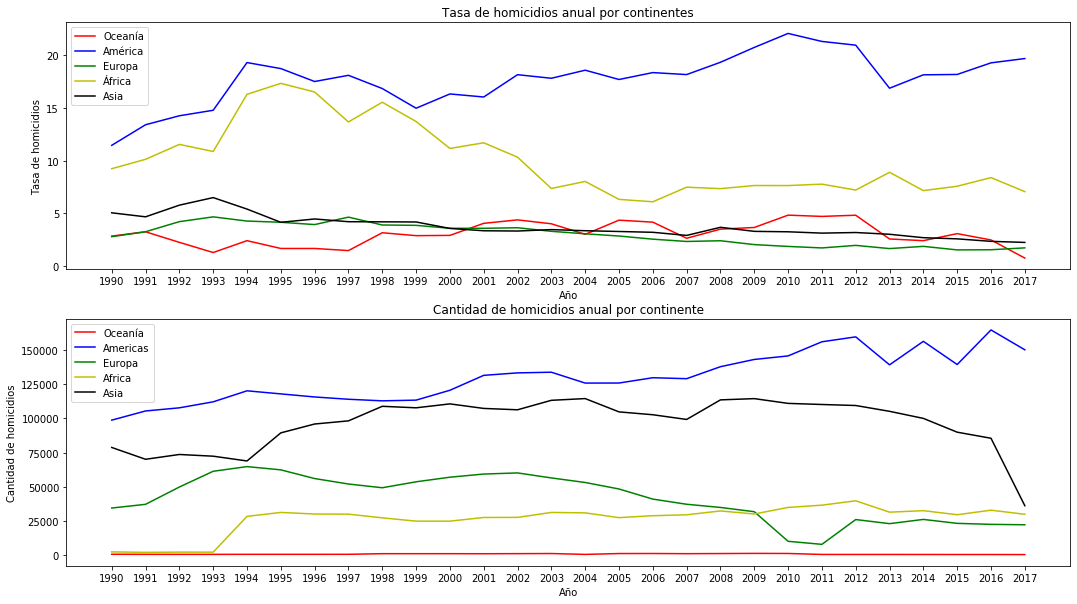

In [7]:
plt.figure(4,figsize=[18,10])
ax1=plt.subplot(2, 1, 1)

ax1.set_ylabel('Tasa de homicidios');
ax1.set_xlabel('Año');
ax1.set_title('Tasa de homicidios anual por continentes')


plt.plot(años,rate[rate['Region']=='Oceania'].describe().iloc[1:2].T,'r',label='Oceanía')
plt.plot(años,rate[rate['Region']=='Americas'].describe().iloc[1:2].T,'b',label='América')
plt.plot(años,rate[rate['Region']=='Europe'].describe().iloc[1:2].T,'g',label='Europa')
plt.plot(años,rate[rate['Region']=='Africa'].describe().iloc[1:2].T,'y',label='África')
plt.plot(años,rate[rate['Region']=='Asia'].describe().iloc[1:2].T,'black',label='Asia')

plt.legend()


ax1=plt.subplot(2, 1, 2)

ax1.set_ylabel('Cantidad de homicidios');
ax1.set_xlabel('Año');
ax1.set_title('Cantidad de homicidios anual por continente')


plt.plot(años,count[count['Region']=='Oceania'].loc[:,'1990':'2017'].sum(),'r',label='Oceanía')
plt.plot(años,count[count['Region']=='Americas'].loc[:,'1990':'2017'].sum(),'b',label='Americas')
plt.plot(años,count[count['Region']=='Europe'].loc[:,'1990':'2017'].sum(),'g',label='Europa')
plt.plot(años,count[count['Region']=='Africa'].loc[:,'1990':'2017'].sum(),'y',label='Africa')
plt.plot(años,count[count['Region']=='Asia'].loc[:,'1990':'2017'].sum(),'black',label='Asia')

plt.legend()


Para el tercer gráfico, primero creo un data frame que solo incluye la información de los últimos 5 años, le llamo last5 y renombro los indices a el nombre del país del cual viene la información. Después, para eliminar los datos 'NaN' uso un for que va verificando que cada año (cada columna) tenga datos, esto mediante:

last5[str(ind)]==last5[str(ind)]

lo cual regresa True si es un número o False si no lo es. Después de haber desechado los 'NaN' filtro la tabla last5.T.describe para ordenar los promedios por país más altos y selecciono los primeros 10. La tabla de datos seleccionada la guardo en graf3.

Se repite el mismo procedimiento pero con la base de datos de cantidad de homicidios.

In [18]:
last5=rate.iloc[:,[27,28,29,30,31]]
last5.index=rate.iloc[:,0]
for x in range(0, 5):
    ind=2013+x
    last5=last5[last5[str(ind)]==last5[str(ind)]]

countries=pd.Series(last5.T.describe().T.sort_values(by=['mean'],ascending=False).index[0:10])
graf3=last5.T[countries].T


last5=count.iloc[:,[27,28,29,30,31]]
last5.index=count.iloc[:,0]
for x in range(0, 5):
    ind=2013+x
    str(ind)
    last5=last5[last5[str(ind)]==last5[str(ind)]]

countries=pd.Series(last5.T.describe().T.sort_values(by=['mean'],ascending=False).index[0:10])
graf4=last5.T[countries].T

Con las tablas graf3 y graf4, grafico para cada uno de los 10 países seleccionados en índice y cantidad de homicidios.

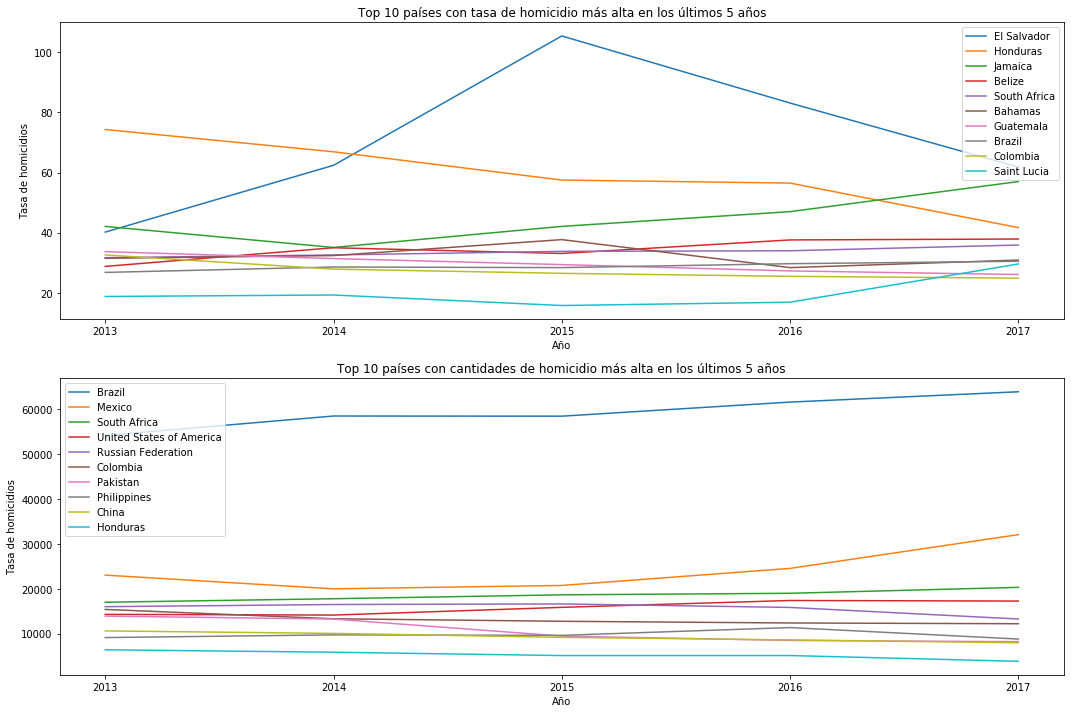

In [19]:
plt.figure(3,figsize=[18,12])
ax=plt.subplot(2, 1, 1)

ax.set_ylabel('Tasa de homicidios');
ax.set_xlabel('Año');
ax.set_title('Top 10 países con tasa de homicidio más alta en los últimos 5 años')

for x in range(0, 10):
    plt.plot(pd.Series(graf3.T.index),graf3.iloc[x],label=graf3.index[x])

plt.legend()


ax=plt.subplot(2, 1, 2)

ax.set_ylabel('Tasa de homicidios');
ax.set_xlabel('Año');
ax.set_title('Top 10 países con cantidades de homicidio más alta en los últimos 5 años')

for x in range(0, 10):
    plt.plot(pd.Series(graf4.T.index),graf4.iloc[x],label=graf4.index[x])

plt.legend()


Para este gráfico filtro los datos de el continente americano y después creo un arreglo con los datos del 2017 de cada subregion, estas se grafican en un gráfico de pastel para observar las proporciones.

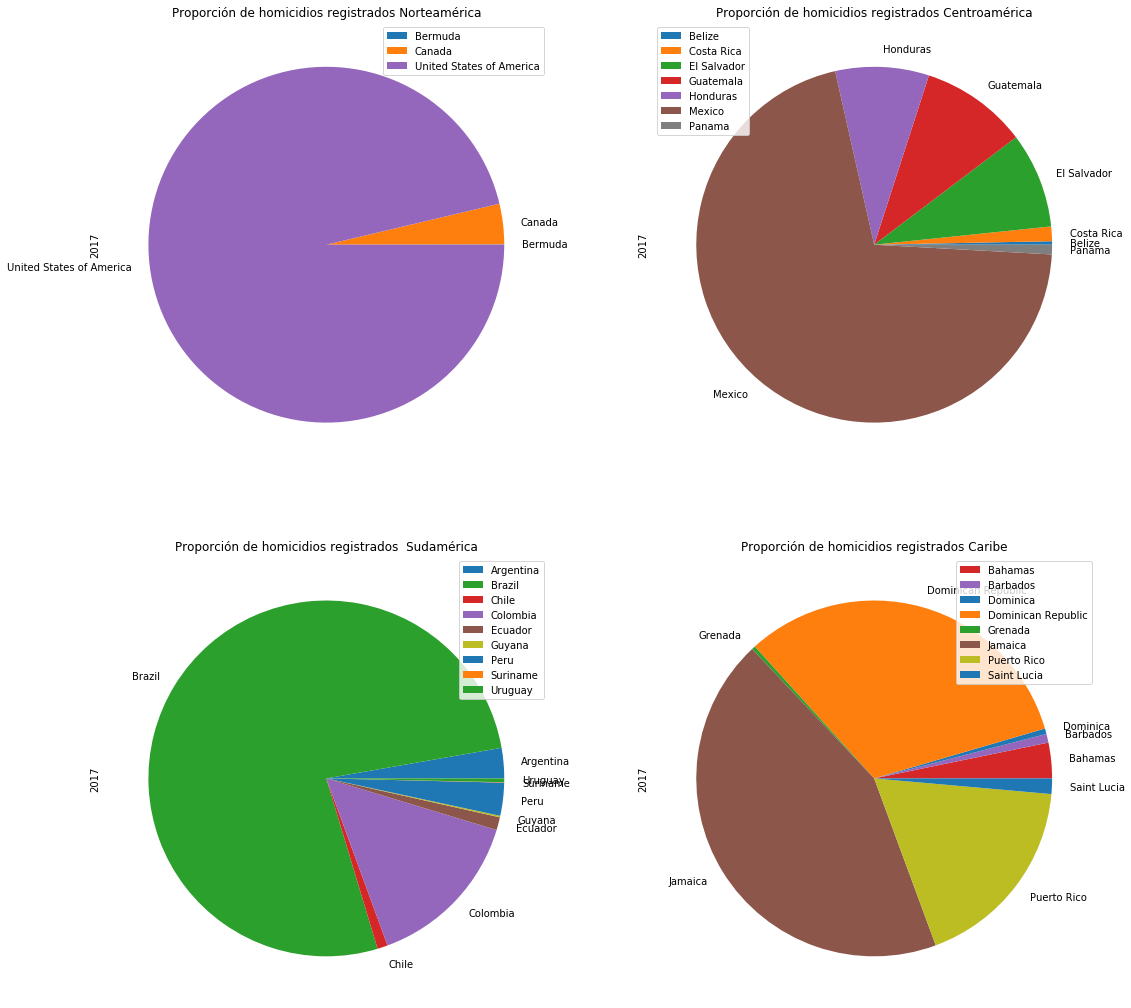

In [10]:
americas=count[count['Region']=='Americas']
diccsubr=pd.Series(['Northern America', 'Central America', 'South America', 'Caribbean'])


c2017n=americas[americas['Subregion']==diccsubr[0]].iloc[:,[0,31]]
c2017c=americas[americas['Subregion']==diccsubr[1]].iloc[:,[0,31]]
c2017s=americas[americas['Subregion']==diccsubr[2]].iloc[:,[0,31]]
c2017car=americas[americas['Subregion']==diccsubr[3]].iloc[:,[0,31]]

c2017n.index=c2017n['Country']
c2017c.index=c2017c['Country']
c2017s.index=c2017s['Country']
c2017car.index=c2017car['Country']


plt.figure(3,figsize=[18,18])
ax=plt.subplot(2, 2, 1)
ax.set_title('Proporción de homicidios registrados Norteamérica');
c2017n['2017'].plot.pie(y='2017')
plt.legend()

ax=plt.subplot(2, 2, 2)
ax.set_title('Proporción de homicidios registrados Centroamérica');
c2017c['2017'].plot.pie(y='2017')
plt.legend()

ax=plt.subplot(2, 2, 3)
ax.set_title('Proporción de homicidios registrados  Sudamérica');
c2017s['2017'].plot.pie(y='2017')
plt.legend()


ax=plt.subplot(2, 2, 4)
ax.set_title('Proporción de homicidios registrados Caribe');
c2017car['2017'].plot.pie(y='2017')
plt.legend()


Intento de último gráfico, quise hacer un gif pero no encontré el modo. Se hacen gráficos de barras de la cantidad de homicidios de las subregiones de América para todos los años de la base de datos.

<Figure size 432x288 with 0 Axes>

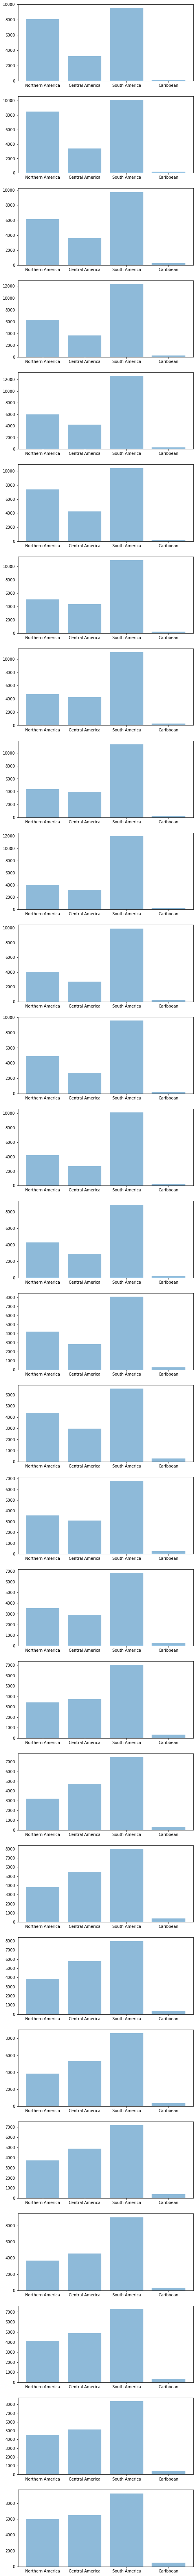

In [20]:
americas=count[count['Region']=='Americas']
diccsubr=pd.Series(['Northern America', 'Central America', 'South America', 'Caribbean'])
graf5=pd.DataFrame(np.zeros((4,28)))
y_pos = np.arange(len(diccsubr))
ims=[]
fig = plt.figure()


for y in range(0,28):
    for x in range(0,4):
        graf5[y][x]=americas[americas['Subregion']==diccsubr[x]].iloc[:,y+4].mean()

    plt.figure(3,figsize=[8,120])
    ax=plt.subplot(28, 1, y+1)
    plt.bar(diccsubr, graf5[y], align='center', alpha=0.5)
    plt.xticks(y_pos, diccsubr)